# Question 1

In [8]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import csv

In [9]:
connection = sql.connect("myFirstDatabase.db")

In [10]:
cursor = connection.cursor()
print(connection.total_changes)

0


In [22]:
tableCreation = '''CREATE TABLE if not exists heart (
                                                        patientID INTEGER PRIMARY KEY AUTOINCREMENT,
                                                        age INTEGER NOT NULL, 
                                                        sex INTEGER NOT NULL, 
                                                        cp INTEGER NOT NULL, 
                                                        trestbps INTEGER NOT NULL, 
                                                        chol INTEGER NOT NULL, 
                                                        fbs INTEGER NOT NULL, 
                                                        restecg INTEGER NOT NULL, 
                                                        thalach INTEGER NOT NULL, 
                                                        exang INTEGER NOT NULL, 
                                                        oldpeak FLOAT NOT NULL, 
                                                        slope INTEGER NOT NULL,
                                                        ca INTEGER NOT NULL, 
                                                        thal INTEGER NOT NULL, 
                                                        target INTEGER NOT NULL)'''

cursor.execute(tableCreation)

In [24]:
df =  pd.read_csv("C:\\Users\\Chris\\Downloads\\heart.csv", header=0, sep=';')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [26]:
df.to_sql('heart', connection, if_exists = 'replace', index = False)

303

In [28]:
pd.read_sql('''SELECT * FROM heart''', connection)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Question 2

**A)**

In [30]:
#Checking if there were ? marks on the columns specified below
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

0

In [32]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [36]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [38]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [40]:
df.duplicated().sum()

1

In [42]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [44]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [46]:
# Update records using cursor.execute
cursor.execute('''UPDATE heart SET sex = 'male' WHERE sex= 1;''')
cursor.execute('''UPDATE heart SET sex = 'female' WHERE sex=0;''')

# Commit the changes
connection.commit()

# Now you can use pd.read_sql if needed
data = pd.read_sql('''SELECT * FROM heart''', connection)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,male,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,male,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,male,0,130,131,0,1,115,1,1.2,1,1,3,0


In [48]:
# Update records using cursor.execute
cursor.execute('''UPDATE heart SET cp = 'none' WHERE cp= 0;''')
cursor.execute('''UPDATE heart SET cp = 'typical angina' WHERE cp= 1;''')
cursor.execute('''UPDATE heart SET cp = 'atypical angina' WHERE cp=2;''')
cursor.execute('''UPDATE heart SET cp = 'non-anginal pain' WHERE cp= 3;''')
cursor.execute('''UPDATE heart SET cp = 'asymptomatic' WHERE cp=4;''')

# Commit the changes 
connection.commit()

#Read pd.read_sql
data = pd.read_sql('''SELECT * FROM heart''', connection)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,non-anginal pain,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,atypical angina,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,typical angina,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,typical angina,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,none,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,none,140,241,0,1,123,1,0.2,1,0,3,0
299,45,male,non-anginal pain,110,264,0,1,132,0,1.2,1,0,3,0
300,68,male,none,144,193,1,1,141,0,3.4,1,2,3,0
301,57,male,none,130,131,0,1,115,1,1.2,1,1,3,0


In [50]:
# Update records using cursor.execute
#fbs
cursor.execute('''UPDATE heart SET fbs = 'false' WHERE fbs= 0;''')
cursor.execute('''UPDATE heart SET fbs = 'true' WHERE fbs=1;''')


cursor.execute('''UPDATE heart SET exang = 'no' WHERE exang= 0;''')
cursor.execute('''UPDATE heart SET exang = 'yes' WHERE exang=1;''')

cursor.execute('''UPDATE heart SET slope = 'upsloping' WHERE slope= 1;''')
cursor.execute('''UPDATE heart SET slope = 'flat' WHERE slope=2;''')
cursor.execute('''UPDATE heart SET slope = 'downsloping' WHERE slope= 3;''')

cursor.execute('''UPDATE heart SET ca = 'mild' WHERE ca=0;''')
cursor.execute('''UPDATE heart SET ca = 'moderate' WHERE ca= 1;''')
cursor.execute('''UPDATE heart SET ca = 'severe' WHERE ca=2;''')

cursor.execute('''UPDATE heart SET thal = 'normal' WHERE thal= 1;''')
cursor.execute('''UPDATE heart SET thal = 'fixed defect' WHERE thal=2;''')
cursor.execute('''UPDATE heart SET thal = 'reversible defect' WHERE thal= 3;''')

cursor.execute('''UPDATE heart SET target = 'healthy' WHERE target= 0;''')
cursor.execute('''UPDATE heart SET target = 'heart disease' WHERE target=1;''')

# Commit the changes
connection.commit()

#Read pd.read_sql
data = pd.read_sql('''SELECT * FROM heart''', connection)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,non-anginal pain,145,233,true,0,150,no,2.3,0,mild,normal,heart disease
1,37,male,atypical angina,130,250,false,1,187,no,3.5,0,mild,fixed defect,heart disease
2,41,female,typical angina,130,204,false,0,172,no,1.4,flat,mild,fixed defect,heart disease
3,56,male,typical angina,120,236,false,1,178,no,0.8,flat,mild,fixed defect,heart disease
4,57,female,none,120,354,false,1,163,yes,0.6,flat,mild,fixed defect,heart disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,none,140,241,false,1,123,yes,0.2,upsloping,mild,reversible defect,healthy
299,45,male,non-anginal pain,110,264,false,1,132,no,1.2,upsloping,mild,reversible defect,healthy
300,68,male,none,144,193,true,1,141,no,3.4,upsloping,severe,reversible defect,healthy
301,57,male,none,130,131,false,1,115,yes,1.2,upsloping,moderate,reversible defect,healthy


In [52]:
data = pd.read_sql('''SELECT * FROM heart''', connection)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,non-anginal pain,145,233,true,0,150,no,2.3,0,mild,normal,heart disease
1,37,male,atypical angina,130,250,false,1,187,no,3.5,0,mild,fixed defect,heart disease
2,41,female,typical angina,130,204,false,0,172,no,1.4,flat,mild,fixed defect,heart disease
3,56,male,typical angina,120,236,false,1,178,no,0.8,flat,mild,fixed defect,heart disease
4,57,female,none,120,354,false,1,163,yes,0.6,flat,mild,fixed defect,heart disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,none,140,241,false,1,123,yes,0.2,upsloping,mild,reversible defect,healthy
299,45,male,non-anginal pain,110,264,false,1,132,no,1.2,upsloping,mild,reversible defect,healthy
300,68,male,none,144,193,true,1,141,no,3.4,upsloping,severe,reversible defect,healthy
301,57,male,none,130,131,false,1,115,yes,1.2,upsloping,moderate,reversible defect,healthy


**B)**

In [54]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

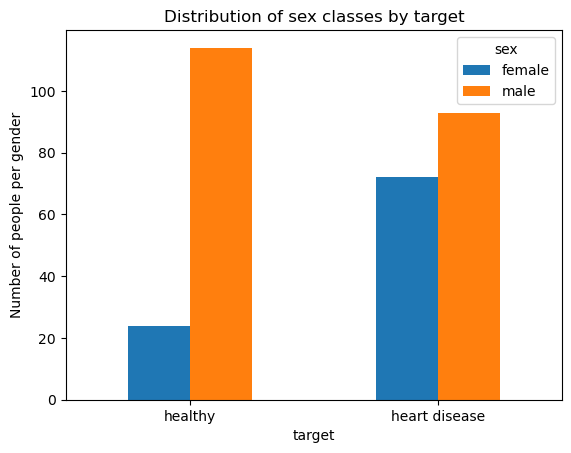

<Figure size 640x480 with 0 Axes>

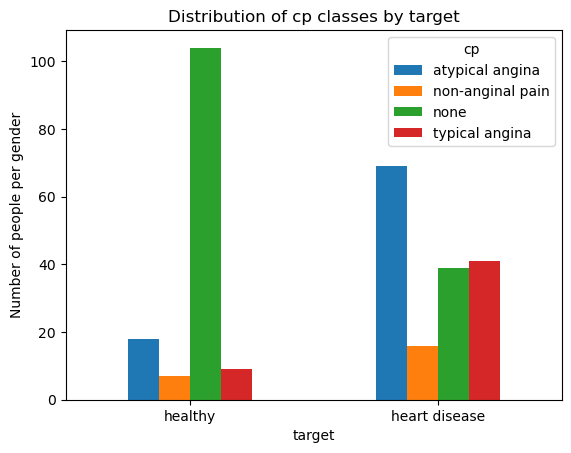

<Figure size 640x480 with 0 Axes>

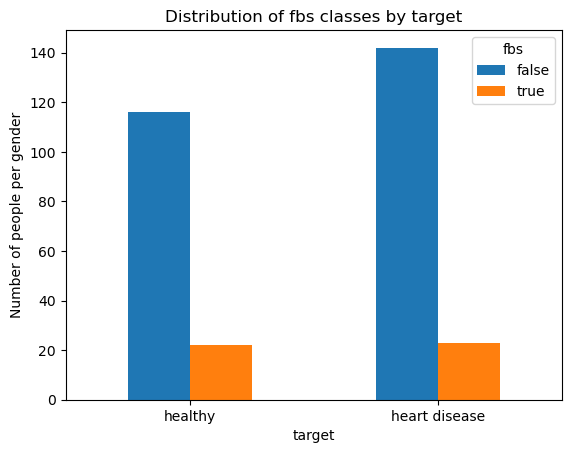

<Figure size 640x480 with 0 Axes>

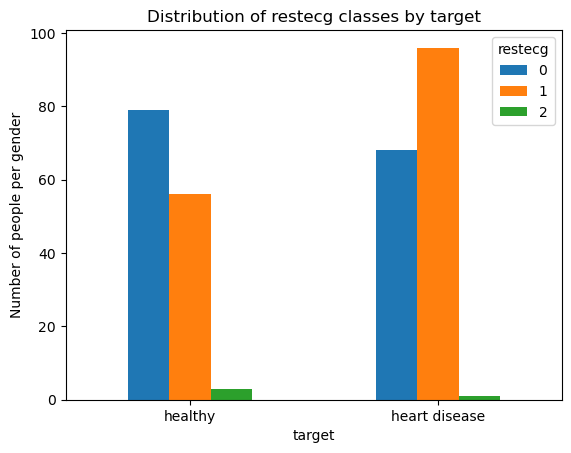

<Figure size 640x480 with 0 Axes>

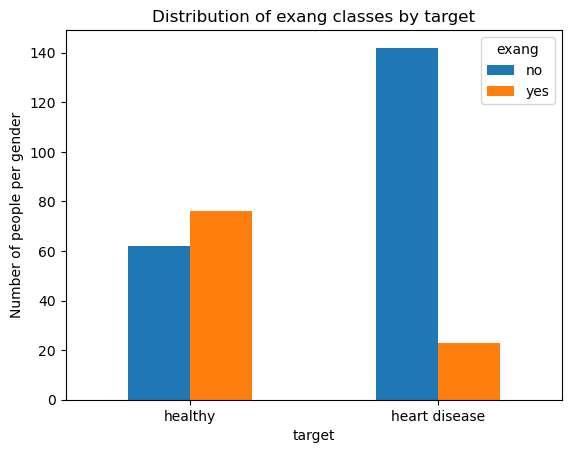

<Figure size 640x480 with 0 Axes>

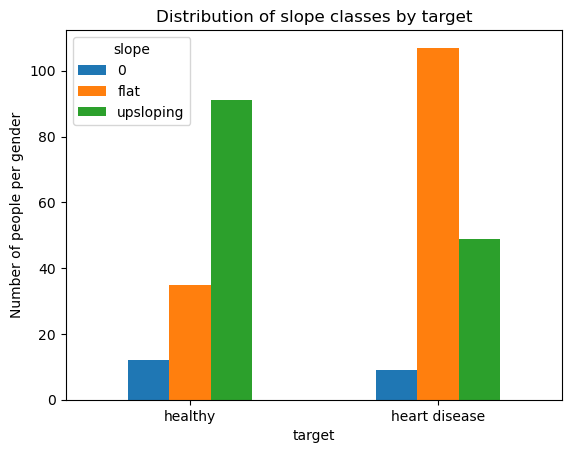

<Figure size 640x480 with 0 Axes>

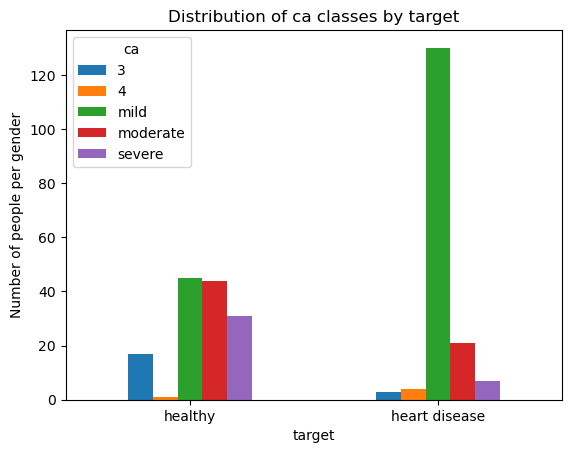

<Figure size 640x480 with 0 Axes>

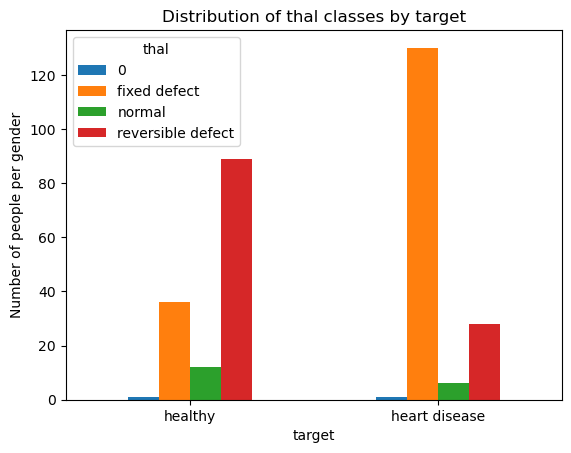

In [113]:
import matplotlib.pyplot as plt

#Create DataFrame with categorical variables and a target variable
#df1 = pd.DataFrame(data)

# Define the categorical variables (replace with your actual variable names)
categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
target_variable = 'target'  

# Loop through each categorical variable
for var in categorical_variables:
  # Create a new figure for each variable
  plt.figure()
  
  # Group data by target variable
  grouped_data = data.groupby(target_variable)[var].value_counts().unstack(fill_value=0)
  
  # Plot the distribution using bar chart (adjust chart type as needed)
  grouped_data.plot(kind='bar', stacked=False)
  
  # Label the plot
  plt.xlabel(target_variable)
  plt.ylabel('Number of people per gender')
  plt.title(f'Distribution of {var} classes by {target_variable}')
  
  # Rotate x-axis labels for readability if needed
  plt.xticks(rotation=0)
  
  # Show the plot
  plt.show()

**C)**

In [56]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

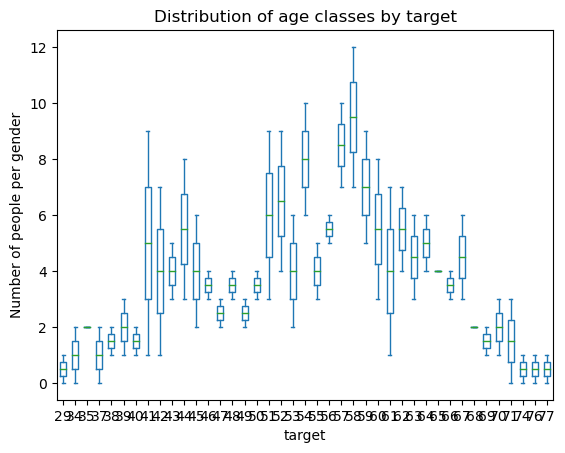

<Figure size 640x480 with 0 Axes>

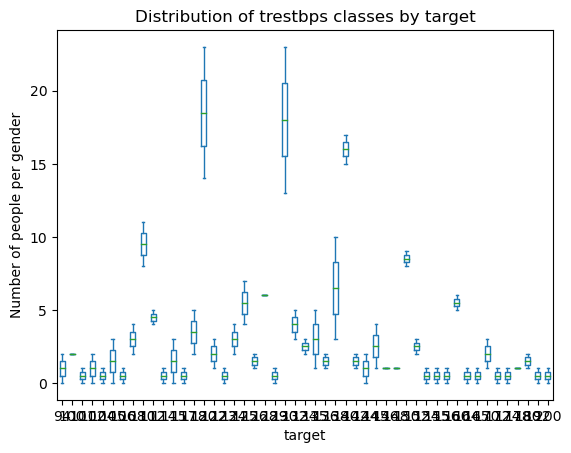

<Figure size 640x480 with 0 Axes>

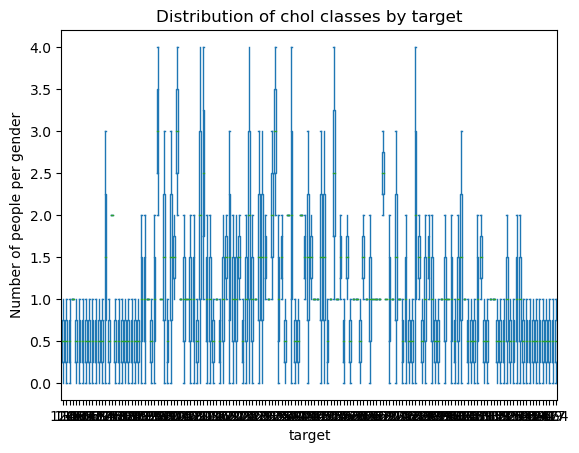

<Figure size 640x480 with 0 Axes>

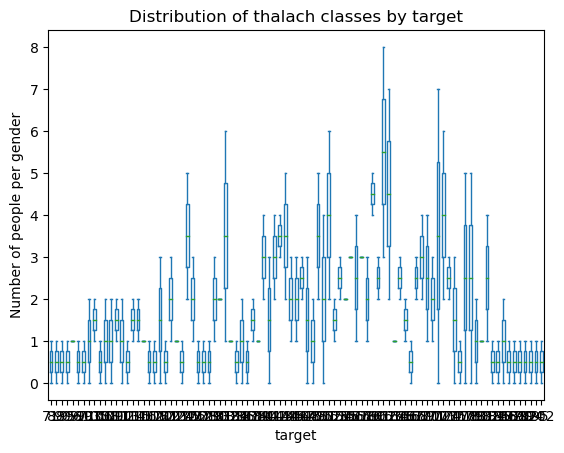

<Figure size 640x480 with 0 Axes>

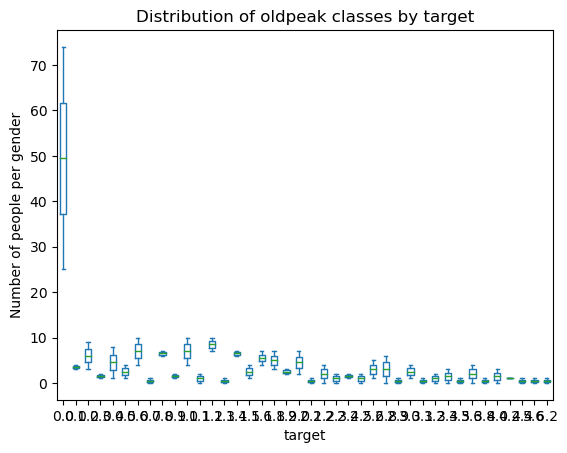

In [133]:
numerical_variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target_variable = 'target'  # Replace with your target variable name

# Loop through each numerical variable
for var in numerical_variables:
  # Create a new figure for each variable
  plt.figure()
  
  # Group data by target variable
  grouped_data = df1.groupby(target_variable)[var].value_counts().unstack(fill_value=0)
  
  # Plot the distribution using bar chart (adjust chart type as needed)
  grouped_data.plot(kind='box', stacked=False)
  
  # Label the plot
  plt.xlabel(target_variable)
  plt.ylabel('Number of people per gender')
  plt.title(f'Distribution of {var} classes by {target_variable}')
  
  # Rotate x-axis labels for readability if needed
  plt.xticks(rotation=0)
  
  # Show the plot
  plt.show()

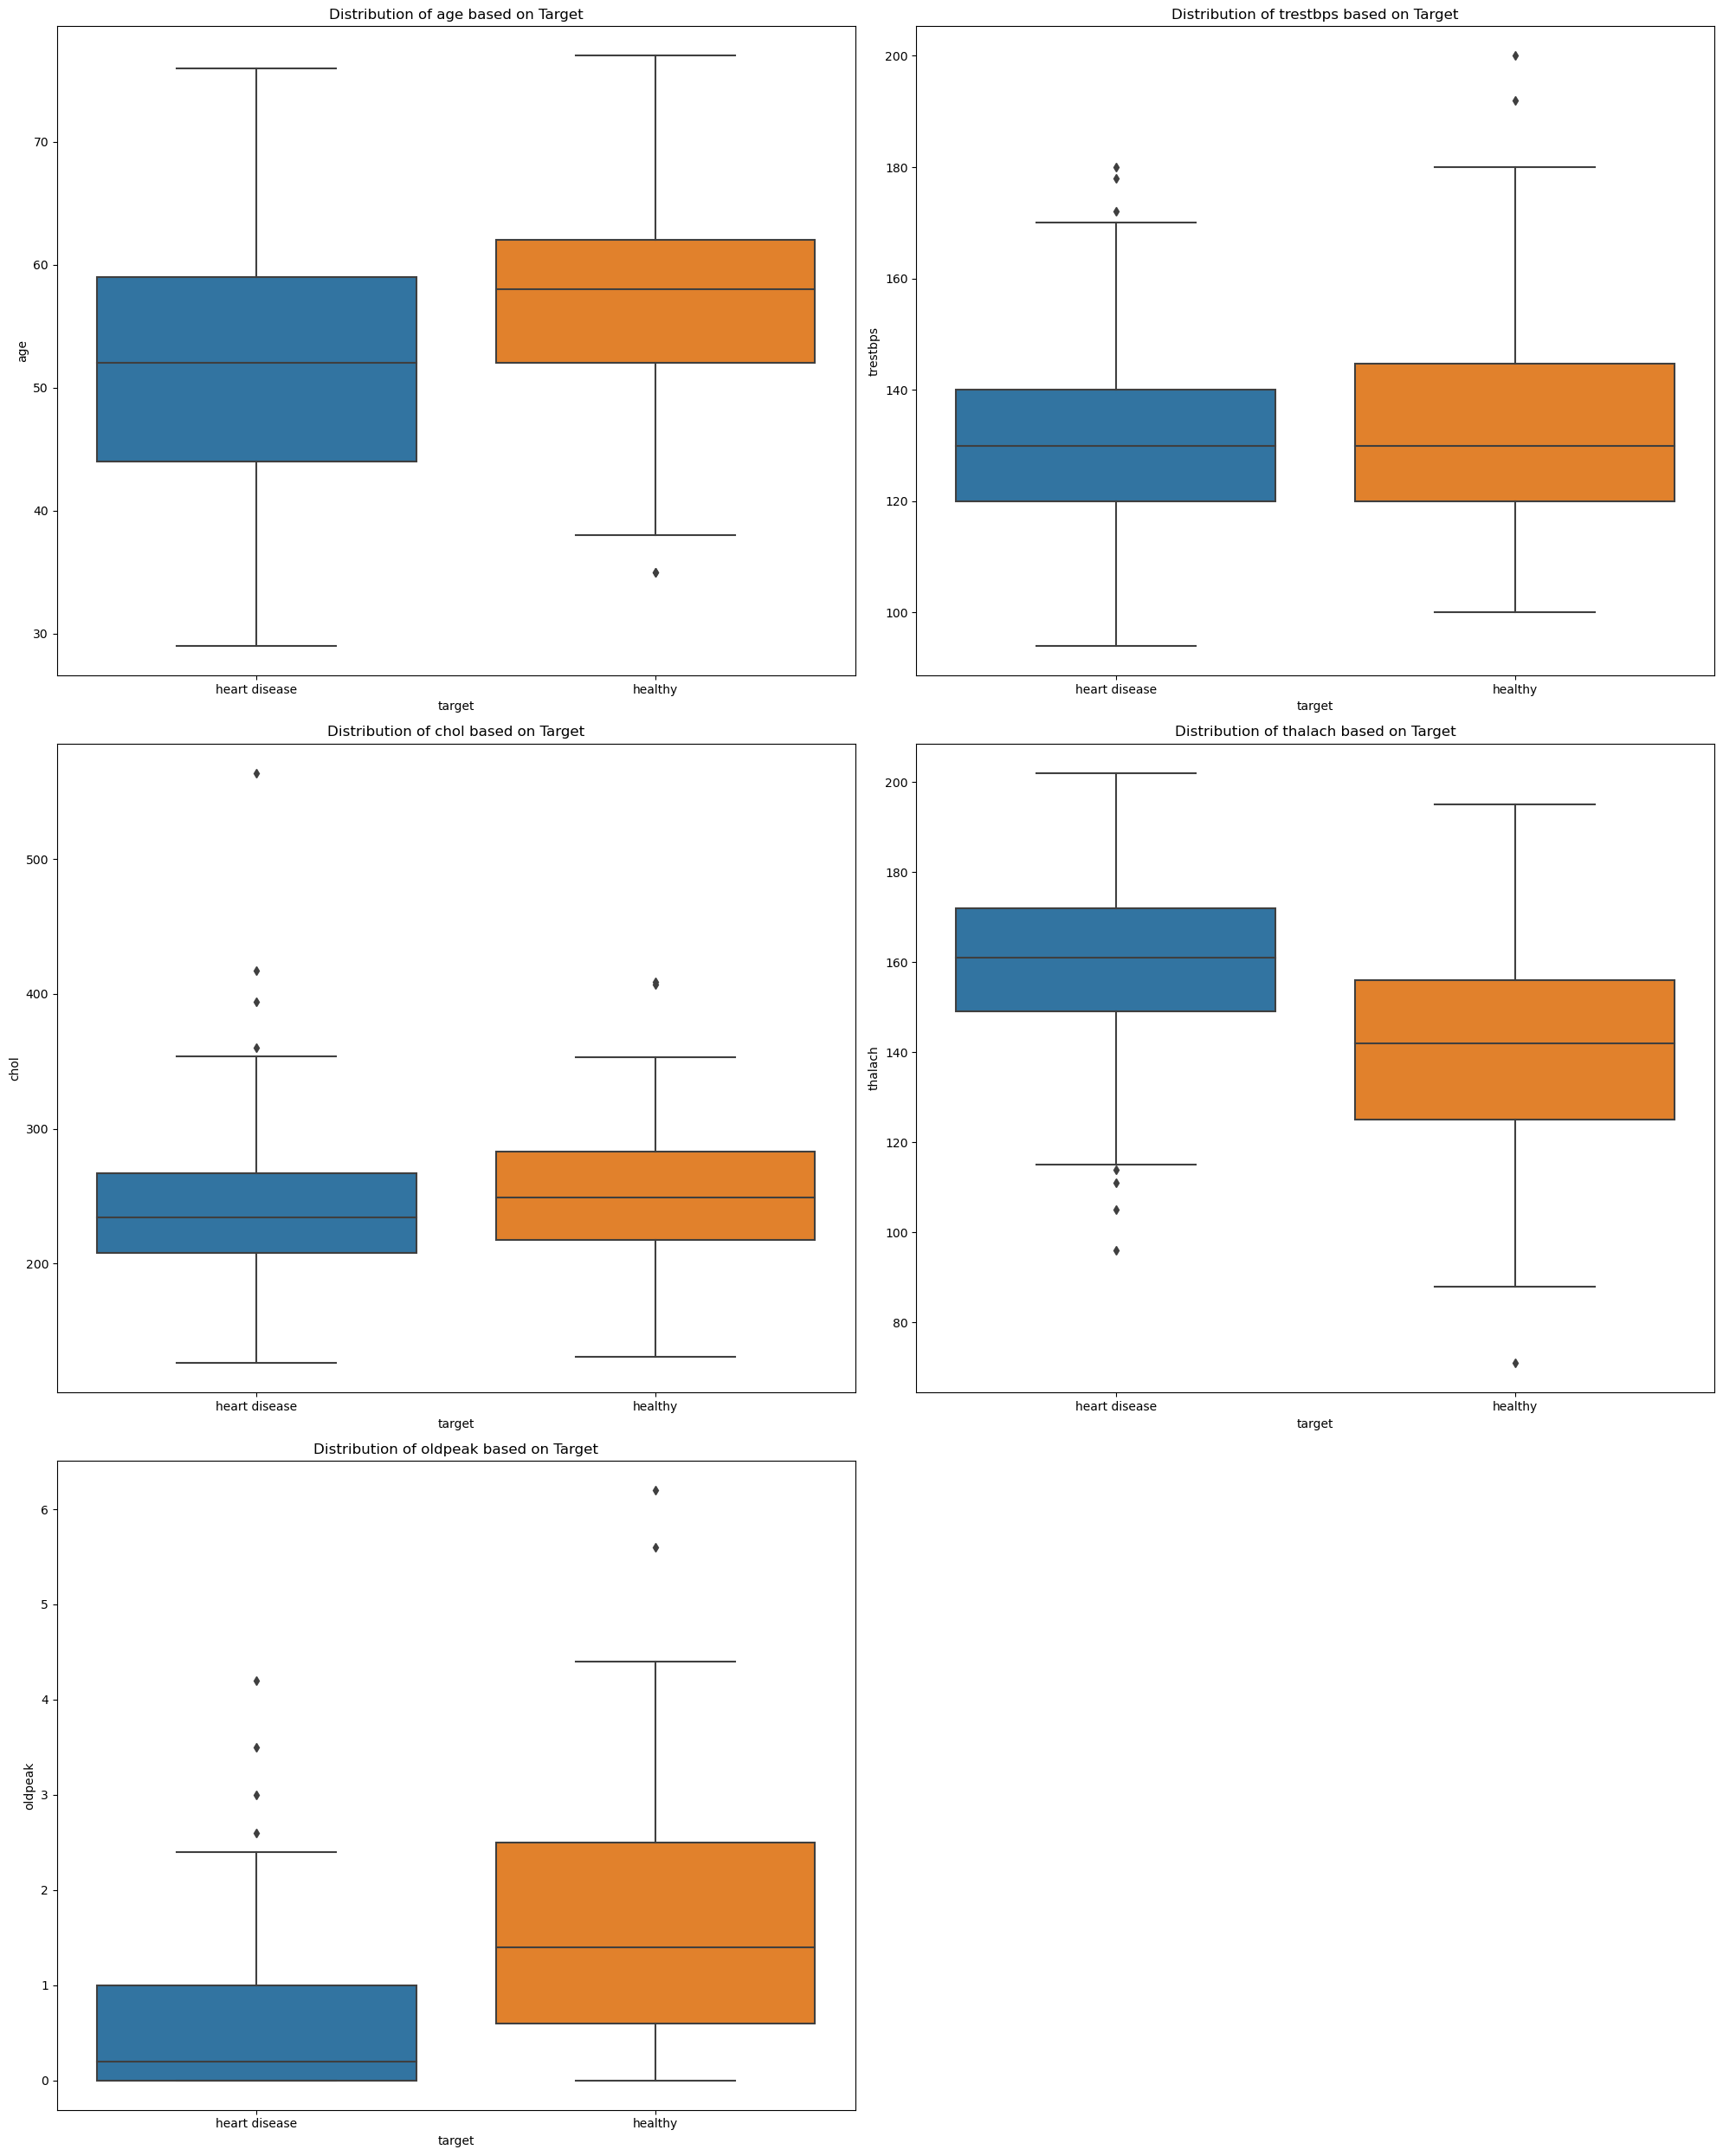

In [135]:
import seaborn as sns

# List of numeric variables
numeric_variables  = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target_variable = 'target' 

# Plot the distribution of classes for each numeric variable based on the target variable
plt.figure(figsize=(20, 25))
for i, var in enumerate(numeric_variables, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='target', y=var, data=data)
    plt.title(f'Distribution of {var} based on Target')
plt.tight_layout()
plt.show()

# Question 3

**3.1)**

In [12]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,non-anginal pain,145,233,true,0,150,no,2.3,0,mild,normal,heart disease
1,37,male,atypical angina,130,250,false,1,187,no,3.5,0,mild,fixed defect,heart disease
2,41,female,typical angina,130,204,false,0,172,no,1.4,flat,mild,fixed defect,heart disease
3,56,male,typical angina,120,236,false,1,178,no,0.8,flat,mild,fixed defect,heart disease
4,57,female,none,120,354,false,1,163,yes,0.6,flat,mild,fixed defect,heart disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,none,140,241,false,1,123,yes,0.2,upsloping,mild,reversible defect,healthy
299,45,male,non-anginal pain,110,264,false,1,132,no,1.2,upsloping,mild,reversible defect,healthy
300,68,male,none,144,193,true,1,141,no,3.4,upsloping,severe,reversible defect,healthy
301,57,male,none,130,131,false,1,115,yes,1.2,upsloping,moderate,reversible defect,healthy


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [523]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [577]:
x = data.drop('target', axis=1)
y = data['target']
print(x)
print(y)

     age     sex                cp  trestbps  chol    fbs  restecg  thalach  \
0     63    male  non-anginal pain       145   233   true        0      150   
1     37    male   atypical angina       130   250  false        1      187   
2     41  female    typical angina       130   204  false        0      172   
3     56    male    typical angina       120   236  false        1      178   
4     57  female              none       120   354  false        1      163   
..   ...     ...               ...       ...   ...    ...      ...      ...   
298   57  female              none       140   241  false        1      123   
299   45    male  non-anginal pain       110   264  false        1      132   
300   68    male              none       144   193   true        1      141   
301   57    male              none       130   131  false        1      115   
302   57  female    typical angina       130   236  false        0      174   

    exang  oldpeak      slope        ca            

In [545]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [23]:
'''
data['slope'] = data['slope'].astype(str)
#data['slope'] = data['slope'].astype(str)
category_imputer = SimpleImputer(strategy='most_frequent')
df['slope'] = category_imputer.fit_transform(df[['slope']])
'''

#impute the slope column with the mode of the string value on the slope column
slope_strings = data['slope'].apply(lambda x: x if isinstance(x, str) else None)
slope_integers = data['slope'].apply(lambda x: x if isinstance(x, int) else None)

# Calculate the mode of the strings
mode_slope_string = slope_strings.mode()[0]

# Replace integers with the mode of the strings
slope_integers_filled = slope_integers.apply(lambda x: mode_slope_string if x is not None else None)

# Combine the two series back, prioritizing the filled integers
data['slope'] = slope_strings.combine_first(slope_integers_filled)

In [583]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,non-anginal pain,145,233,true,0,150,no,2.3,flat,mild,normal,heart disease
1,37,male,atypical angina,130,250,false,1,187,no,3.5,flat,mild,fixed defect,heart disease
2,41,female,typical angina,130,204,false,0,172,no,1.4,flat,mild,fixed defect,heart disease
3,56,male,typical angina,120,236,false,1,178,no,0.8,flat,mild,fixed defect,heart disease
4,57,female,none,120,354,false,1,163,yes,0.6,flat,mild,fixed defect,heart disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,none,140,241,false,1,123,yes,0.2,upsloping,mild,reversible defect,healthy
299,45,male,non-anginal pain,110,264,false,1,132,no,1.2,upsloping,mild,reversible defect,healthy
300,68,male,none,144,193,true,1,141,no,3.4,upsloping,severe,reversible defect,healthy
301,57,male,none,130,131,false,1,115,yes,1.2,upsloping,moderate,reversible defect,healthy


In [24]:
#impute the ca column with the mode of the string value on the ca column
ca_strings = data['ca'].apply(lambda x: x if isinstance(x, str) else None)
ca_integers = data['ca'].apply(lambda x: x if isinstance(x, int) else None)

# Calculate the mode of the strings
mode_ca_string = ca_strings.mode()[0]

# Replace integers with the mode of the strings
ca_integers_filled = ca_integers.apply(lambda x: mode_ca_string if x is not None else None)

# Combine the two series back, prioritizing the filled integers
data['ca'] = ca_strings.combine_first(ca_integers_filled)

In [587]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,non-anginal pain,145,233,true,0,150,no,2.3,flat,mild,normal,heart disease
1,37,male,atypical angina,130,250,false,1,187,no,3.5,flat,mild,fixed defect,heart disease
2,41,female,typical angina,130,204,false,0,172,no,1.4,flat,mild,fixed defect,heart disease
3,56,male,typical angina,120,236,false,1,178,no,0.8,flat,mild,fixed defect,heart disease
4,57,female,none,120,354,false,1,163,yes,0.6,flat,mild,fixed defect,heart disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,none,140,241,false,1,123,yes,0.2,upsloping,mild,reversible defect,healthy
299,45,male,non-anginal pain,110,264,false,1,132,no,1.2,upsloping,mild,reversible defect,healthy
300,68,male,none,144,193,true,1,141,no,3.4,upsloping,severe,reversible defect,healthy
301,57,male,none,130,131,false,1,115,yes,1.2,upsloping,moderate,reversible defect,healthy


In [591]:
#impute the thal column with the mode of the string value on the thal column
thal_strings = data['thal'].apply(lambda x: x if isinstance(x, str) else None)
thal_integers = data['thal'].apply(lambda x: x if isinstance(x, int) else None)

# Calculate the mode of the strings
mode_thal_string = thal_strings.mode()[0]

# Replace integers with the mode of the strings
thal_integers_filled = thal_integers.apply(lambda x: mode_thal_string if x is not None else None)

# Combine the two series back, prioritizing the filled integers
data['thal'] = thal_strings.combine_first(thal_integers_filled)

In [593]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,0,150,0,2.3,0,0,normal,heart disease
1,37,1,0,130,250,0,1,187,0,3.5,0,0,fixed defect,heart disease
2,41,0,3,130,204,0,0,172,0,1.4,0,0,fixed defect,heart disease
3,56,1,3,120,236,0,1,178,0,0.8,0,0,fixed defect,heart disease
4,57,0,2,120,354,0,1,163,1,0.6,0,0,fixed defect,heart disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,2,140,241,0,1,123,1,0.2,1,0,reversible defect,healthy
299,45,1,1,110,264,0,1,132,0,1.2,1,0,reversible defect,healthy
300,68,1,2,144,193,1,1,141,0,3.4,1,2,reversible defect,healthy
301,57,1,2,130,131,0,1,115,1,1.2,1,1,reversible defect,healthy


In [29]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

# Label Encoding for binary categorical features
label_encoder = LabelEncoder()
data['sex'] = data['sex'].astype(str)
data['sex'] = label_encoder.fit_transform(data['sex'])
data['fbs'] = data['fbs'].astype(str)
data['fbs'] = label_encoder.fit_transform(data['fbs'])
data['exang'] = data['exang'].astype(str)
data['exang'] = label_encoder.fit_transform(data['exang'])

data['cp'] = data['cp'].astype(str)
data['cp'] = label_encoder.fit_transform(data['cp'])
data['restecg'] = data['restecg'].astype(str)
data['restecg'] = label_encoder.fit_transform(data['restecg'])
data['slope'] = data['slope'].astype(str)
data['slope'] = label_encoder.fit_transform(data['slope'])
data['ca'] = data['ca'].astype(str)
data['ca'] = label_encoder.fit_transform(data['ca'])
data['thal'] = data['thal'].astype(str)
data['thal'] = label_encoder.fit_transform(data['thal'])

# One-Hot Encoding for nominal categorical features
#data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'ca', 'thal'])

'''
n = ['upsloping', 'flat', 'downsloping'] #slope
n1 = ['mild', 'moderate', 'severe']  #ca
n2 = ['normal', 'abnormal', 'venticular hypertrophy']  #restecg
n3 = ['normal', 'fixed defect', 'reversible defect'] #thal
n4 = ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'] #cp

enc = OrdinalEncoder(categories= [n])
enc1 = OrdinalEncoder(categories= [n1])
enc2 = OrdinalEncoder(categories= [n2])
enc3 = OrdinalEncoder(categories= [n3])
enc4 = OrdinalEncoder(categories= [n4])

data['cp'] = enc4.fit_transform(data['cp'])
data['restecg'] = enc2.fit_transform(data['restecg'])
data['slope'] = enc.fit_transform(data['slope'])
data['ca'] = enc1.fit_transform(data['ca'])
data['thal'] = enc3.fit_transform(data['thal'])
'''

#Separately encoding the target variable using label encoding
data['target'] = label_encoder.fit_transform(data['target'])

print(x)
print(y)
data

     age     sex                cp  trestbps  chol    fbs  restecg  thalach  \
0     63    male  non-anginal pain       145   233   true        0      150   
1     37    male   atypical angina       130   250  false        1      187   
2     41  female    typical angina       130   204  false        0      172   
3     56    male    typical angina       120   236  false        1      178   
4     57  female              none       120   354  false        1      163   
..   ...     ...               ...       ...   ...    ...      ...      ...   
298   57  female              none       140   241  false        1      123   
299   45    male  non-anginal pain       110   264  false        1      132   
300   68    male              none       144   193   true        1      141   
301   57    male              none       130   131  false        1      115   
302   57  female    typical angina       130   236  false        0      174   

    exang  oldpeak      slope        ca            

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,0,150,0,2.3,0,0,2,1
1,37,1,0,130,250,0,1,187,0,3.5,0,0,1,1
2,41,0,3,130,204,0,0,172,0,1.4,0,0,1,1
3,56,1,3,120,236,0,1,178,0,0.8,0,0,1,1
4,57,0,2,120,354,0,1,163,1,0.6,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,2,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,1,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,2,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,2,130,131,0,1,115,1,1.2,1,1,3,0


In [32]:
x = data.drop('target', axis=1)
y = data['target']
print(x)
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        0      150      0      2.3   
1     37    1   0       130   250    0        1      187      0      3.5   
2     41    0   3       130   204    0        0      172      0      1.4   
3     56    1   3       120   236    0        1      178      0      0.8   
4     57    0   2       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   2       140   241    0        1      123      1      0.2   
299   45    1   1       110   264    0        1      132      0      1.2   
300   68    1   2       144   193    1        1      141      0      3.4   
301   57    1   2       130   131    0        1      115      1      1.2   
302   57    0   3       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     2  
1        0   0     1  
2        0   0    

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)

In [34]:
x_train.shape

(242, 13)

In [35]:
x_test.shape

(61, 13)

In [ ]:
#std_x = StandardScaler() 
#x_train = std_x.fit_transform(x_train) 
#x_test = std_x.transform(x_test)

**3.2)**

### Logistic Regression
Logistic regression is a basic classification algorithm that predicts the probability of a categorical outcome (usually binary) 
rather than a continuous value. Logistic regression calculates the probability of an event occurring 
(such as voting or not voting) based on known facts.

**Advantages:**
- **Widespread Use:** Widely understood and used across many industries, even by non-technical professionals.
- **Interpretability:** Model coefficients are easy to interpret.
- **Less Sensitive to Outliers:** Less affected by outliers compared to algorithms like k-Nearest Neighbors and SVM.
- **Probability Scores:** Provides probability scores for outcomes.
- **Efficiency:** Computationally efficient and works well with small to medium-sized datasets.

**Disadvantages:**
- **Linear Assumption:** Assumes a linear relationship between features and the log odds of the outcome.
- **Limited with Large Feature Space:** Doesn’t perform well with a large number of features or high-dimensional data.
- **Outlier Sensitivity:** Can be affected by outliers, though less so than some other models.
- **Bias to Training Set:** Can be biased towards the training data.
- **Non-linear Relationships:** Requires transformations to handle non-linear features.

**Use Cases:** Commonly used for binary classification tasks such as spam detection and medical diagnosis.


In [36]:
from sklearn.linear_model import LogisticRegression
linRegModel = LogisticRegression()

In [38]:
linRegModel.fit(x_train,y_train)

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_value_pred = linRegModel.predict(x_test)

In [40]:
print ("% = "+ str((linRegModel.score(x_test, y_test))*100))

% = 85.24590163934425


In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_value_pred))

[[26  3]
 [ 6 26]]


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_value_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [43]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_value_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8524590163934426


In [47]:
print("{:,.02f}".format(accuracy)+"%")

0.85%


### Decision Trees
A decision tree is a tool used for decision-making that organizes information into a tree structure, aiding in categorization 
and prediction of values within data. Decision trees use a tree-like model of decisions by recursively splitting the data 
based on feature values to make predictions.

**Advantages:**
- **Intuitive Rules:** Easy to understand and interpret.
- **Non-linear Relationships:** Can capture non-linear relationships and interactions between variables.
- **Versatile:** Can handle both numerical and categorical data without any assumptions about their distribution.

**Disadvantages:**
- **Overfitting:** Prone to overfitting the training data, which can reduce generalizability.
- **Bias to Training Data:** Can be biased towards the training set, though ensemble methods like Random Forests can mitigate 
    this.

**Use Cases:** Suitable for both classification and regression tasks.

In [643]:
from sklearn.tree import DecisionTreeClassifier
dscTree_ClassModel = DecisionTreeClassifier()

In [677]:
dscTree_ClassModel = dscTree_ClassModel.fit(x_train,y_train)
dscTree_ClassModel

DecisionTreeClassifier()

In [647]:
dscTree_ClassModel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [649]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,2,150,276,0,0,112,1,0.6,1,1,1
228,59,1,1,170,288,0,0,159,0,0.2,1,0,2
111,57,1,0,150,126,1,1,173,0,0.2,0,1,2
246,56,0,2,134,409,0,0,150,1,1.9,1,2,2
60,71,0,0,110,265,1,0,130,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,0,140,254,0,0,146,0,2.0,1,0,2
104,50,1,0,129,196,0,1,163,0,0.0,0,0,0
300,68,1,2,144,193,1,1,141,0,3.4,1,2,2
193,60,1,2,145,282,0,0,142,1,2.8,1,2,2


In [651]:
predictions =dscTree_ClassModel.predict(x_test)
predictions

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [653]:
dscTree_ClassModel.predict_proba(x_test)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [661]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7213114754098361

In [663]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[21,  8],
       [ 9, 23]], dtype=int64)

In [665]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.7419354838709677

In [667]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.71875

In [669]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71        29
           1       0.74      0.72      0.73        32

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



### Support Vector Machine (SVM)
Support Vector Machines (SVMs) are a machine learning technique that classifies data by identifying the optimal line or 
plane that divides distinct groups within a multi-dimensional space. SVMs find the optimal hyperplane that best separates 
the classes in the feature space, effective in both linear and non-linear classification using different kernel functions.

**Advantages:**
- **High-dimensional Spaces:** Performs well in high-dimensional spaces.
- **Non-linear Classification:** Can handle non-linear relationships using kernel functions.
- **Overfitting Resistance:** Effective against overfitting with appropriate regularization.

**Disadvantages:**
- **Computational Intensity:** Requires significant computational resources, especially with large datasets.
- **Training Time:** Training can be slow for large datasets.
- **Parameter Tuning:** Requires careful tuning of parameters like the kernel type and regularization factors.
- **Overlapping Classes:** Struggles with overlapping class distributions.

**Use Cases:** Ideal for complex classification problems where feature space is large, and resources are not a constraint.

In [685]:
from sklearn.svm import SVC
svcModel = SVC()

In [687]:
svcModel.fit(x_train, y_train)

SVC()

In [689]:
svcModel.score(x_test, y_test)

0.7049180327868853

In [ ]:
#regularization

In [693]:
svcModelReg0 = SVC(C=0.1)
svcModelReg0.fit(x_train, y_train)

SVC(C=0.1)

In [695]:
svcModelReg0.score(x_test, y_test)

0.5245901639344263

In [697]:
svcModelReg1 = SVC(C=1)
svcModelReg1.fit(x_train, y_train)
svcModelReg1.score(x_test, y_test)

0.7049180327868853

In [703]:
svcModelReg2= SVC(C=100)
svcModelReg2.fit(x_train, y_train)
svcModelReg2.score(x_test, y_test)

0.7704918032786885

In [705]:
#gamma testing

In [706]:
svcModelGmma= SVC(gamma=0.1)
svcModelGmma.fit(x_train, y_train)
svcModelGmma.score(x_test, y_test)

0.5081967213114754

In [709]:
svcModelGmma1= SVC(gamma=1)
svcModelGmma1.fit(x_train, y_train)
svcModelGmma1.score(x_test, y_test)

0.5245901639344263

In [711]:
svcModelGmma2= SVC(gamma=100)
svcModelGmma2.fit(x_train, y_train)
svcModelGmma2.score(x_test, y_test)

0.5245901639344263

In [ ]:
#Kernel

In [713]:
svcModelLnr = SVC(kernel='linear')
svcModelLnr.fit(x_train, y_train)
svcModelLnr.score(x_test, y_test)

0.8360655737704918

In [715]:
svcModelLnr = SVC(kernel='rbf')
svcModelLnr.fit(x_train, y_train)
svcModelLnr.score(x_test, y_test)

0.7049180327868853

In [673]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))

# Choose the best model based on accuracy
best_model = max(models.items(), key=lambda x: accuracy_score(y_test, x[1].predict(x_test)))[1]

# Save the best model
#joblib.dump(best_model, 'best_model.pkl')


C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Random Forest Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82      0.88      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

SVM Accuracy: 0.7049180327868853
              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   

In [48]:
#Saving the trained logistic Regression model
import pickle

# save the logistic regression model as a pickle file
trained_LinearRegression_Model_File = "C:\\Users\\Chris\\Downloads\\decisionsupportsystem\\trainedModel.pkl"  

with open(trained_LinearRegression_Model_File, 'wb') as file:  
    pickle.dump(linRegModel, file)


In [735]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,0,150,0,2.3,0,0,1
1,37,1,0,130,250,0,1,187,0,3.5,0,0,0
2,41,0,3,130,204,0,0,172,0,1.4,0,0,0
3,56,1,3,120,236,0,1,178,0,0.8,0,0,0
4,57,0,2,120,354,0,1,163,1,0.6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,2,140,241,0,1,123,1,0.2,1,0,2
299,45,1,1,110,264,0,1,132,0,1.2,1,0,2
300,68,1,2,144,193,1,1,141,0,3.4,1,2,2
301,57,1,2,130,131,0,1,115,1,1.2,1,1,2


In [767]:
x = np.array([['22', 'male', 'non-anginal pain','121', '309','false','normal', '169','no','2.9','flat','mild','normal']])
x

array([['22', 'male', 'non-anginal pain', '121', '309', 'false',
        'normal', '169', 'no', '2.9', 'flat', 'mild', 'normal']],
      dtype='<U16')

In [747]:
x[:, 1] = label_encoder.fit_transform(x[:, 0])
x[:, 2] = label_encoder.fit_transform(x[:, 2])
x[:, 5] = label_encoder.fit_transform(x[:, 5])

x[:, 6] = label_encoder.fit_transform(x[:, 6])
x[:, 8] = label_encoder.fit_transform(x[:, 8])
x[:, 10] = label_encoder.fit_transform(x[:, 10])
x[:, 11] = label_encoder.fit_transform(x[:, 11])
x[:, 12] = label_encoder.fit_transform(x[:, 12])

x=x.astype(float)
x

array([[  0. ,   0. ,   0. , 121. , 309. ,   0. ,   0. , 169. ,   0. ,
          2.9,   0. ,   0. ,   0. ]])

In [49]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_scaled = scaler.transform(x)

In [50]:
#Using the logistic linear regression
y_value_pred = linRegModel.predict(x)
y_value_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [53]:
linRegModel.score(x, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [61, 303]